<a href="https://www.kaggle.com/code/vedatgul/telco-churn-prediction?scriptVersionId=128343414" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

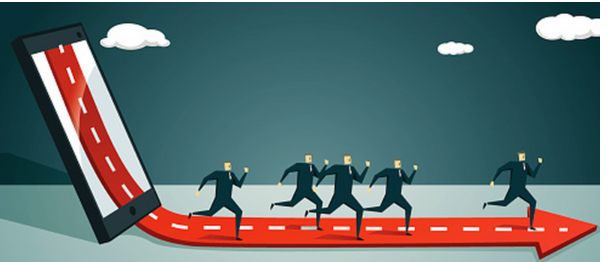

It is desired to carry out a machine learning project regarding the prices of different types of houses by using the data set containing the features and house prices of each house.

# <span style="color:#2D7680"> Table of Contents </span>

[<span style="color:#2D7680">   1. Examine the Dataset  </span>](#Exa)

[<span style="color:#2D7680">   2. Data Preparation  </span>](#Dat)

[<span style="color:#2D7680">   3. Feature Engineering  </span>](#Fea)

[<span style="color:#2D7680">   4. Modelling  </span>](#Mod)

##  <span style="color:#2D7680"> 1. Examine the Dataset </span> <a class="anchor" id="Exa"></a> 

Telco churn data revealed fictitious home phone and Internet services to 7,043 California customers in the third quarter.
Contains information about a telecom company. Which customers have left, stayed or signed up for their service
shows.

**CustomerId**

**Gender**

**SeniorCitizen:** Whether the client is older (1, 0)

**Partner:** Whether the client has a partner (Yes, No)

**Dependents:** Whether the customer has dependents (Yes, No

**Tenure:** The number of months the customer has stayed with the company

**PhoneService:** Whether the customer has phone service (Yes, No)

**MultipleLines:** Whether the customer has more than one line (Yes, No, No Telephone service)

**InternetService:** Customer's internet service provider (DSL, Fiber optic, No)

**OnlineSecurity:** Whether the customer has online security (Yes, No, no Internet service)

**OnlineBackup:** Whether the customer has an online backup (Yes, No, no Internet service)

**DeviceProtection:** Whether the customer has device protection (Yes, No, no Internet service)

**TechSupport:** Whether the customer has technical support (Yes, No, no Internet service)

**StreamingTV:** Whether the customer has TV streaming (Yes, No, no Internet service)

**StreamingMovies:** Whether the customer is streaming movies (Yes, No, no Internet service)

**Contract:** Customer's contract duration (Month to month, One year, Two years)

**PaperlessBilling:** Whether the customer has a paperless invoice (Yes, No)

**PaymentMethod:** Customer's payment method (Electronic check, Postal check, Bank transfer (automatic), Credit card (automatic))

**MonthlyCharges:** The amount charged to the customer monthly

**TotalCharges:** The total amount charged from the customer

**Churn:** Whether the customer uses it (Yes or No)


##  <span style="color:#2D7680"> 2. Data Preparation </span> <a class="anchor" id="Dat"></a> 

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler, RobustScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate, validation_curve
from sklearn.metrics import precision_score, f1_score, recall_score, roc_auc_score, accuracy_score
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
pd.set_option("display.max_columns", None)
pd.set_option("display.float_format", lambda x: "%.3f" % x)
pd.set_option("display.width", 500)
import warnings
warnings.simplefilter(action="ignore")

In [2]:
df = pd.read_csv("/kaggle/input/telecom-dataset/telco.csv")

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.850,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.950,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.850,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.300,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.700,151.65,Yes


In [4]:
df.shape

(7043, 21)

In [5]:
# Capture the numeric and categorical variables 

def grab_col_names(dataframe, cat_th=10, car_th=20):
    
    # cat_cols, cat_but_car
    # 1- Categorical variables
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
    
    # 2- Numeric but actually categorical (class)
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and
                        dataframe[col].dtypes != "O"]
    
    # 3 - Categorical but actually each cardinal, that is, unique
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and
                        dataframe[col].dtypes == "O"]
    
    # 4 - Collect the cat_cols and num_but_cat variables
    cat_cols = cat_cols + num_but_cat
    
    # 5- Subtract the cardinal variable from cat_cols
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    # num_cols
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]

    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f'cat_cols: {len(cat_cols)}')
    print(f'num_cols: {len(num_cols)}')
    print(f'cat_but_car: {len(cat_but_car)}')
    print(f'num_but_cat: {len(num_but_cat)}')
    return cat_cols, num_cols, cat_but_car

In [6]:
cat_cols, num_cols, cat_but_car = grab_col_names(df)

Observations: 7043
Variables: 21
cat_cols: 17
num_cols: 2
cat_but_car: 2
num_but_cat: 1


In [7]:
# Make the necessary adjustments. (Like variables with type errors) 

df["SeniorCitizen"].max()

1

In [8]:
df.SeniorCitizen=df.SeniorCitizen.astype("object")
df.TotalCharges = pd.to_numeric(df.TotalCharges, errors='coerce')
df.dtypes

customerID           object
gender               object
SeniorCitizen        object
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [9]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [10]:
df.dropna(inplace = True)
df['Churn'].replace(to_replace='Yes', value=1, inplace=True)
df['Churn'].replace(to_replace='No',  value=0, inplace=True)
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.850,29.850,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.950,1889.500,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.850,108.150,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.300,1840.750,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.700,151.650,1


In [11]:
# Let's observe the distribution of numerical and categorical variables in the data

for col in cat_cols:
    print(pd.DataFrame({col: df[col].value_counts(),
                        "Ratio": 100 * df[col].value_counts() / len(df)}))
    print("######################")

df.describe().T

        gender  Ratio
Male      3549 50.469
Female    3483 49.531
######################
     Partner  Ratio
No      3639 51.749
Yes     3393 48.251
######################
     Dependents  Ratio
No         4933 70.151
Yes        2099 29.849
######################
     PhoneService  Ratio
Yes          6352 90.330
No            680  9.670
######################
                  MultipleLines  Ratio
No                         3385 48.137
Yes                        2967 42.193
No phone service            680  9.670
######################
             InternetService  Ratio
Fiber optic             3096 44.027
DSL                     2416 34.357
No                      1520 21.615
######################
                     OnlineSecurity  Ratio
No                             3497 49.730
Yes                            2015 28.655
No internet service            1520 21.615
######################
                     OnlineBackup  Ratio
No                           3087 43.899
Yes            

,count,mean,std,min,25%,50%,75%,max
tenure,7032.000,32.422,24.545,1.000,9.000,29.000,55.000,72.000
MonthlyCharges,7032.000,64.798,30.086,18.250,35.587,70.350,89.862,118.750
TotalCharges,7032.000,2283.300,2266.771,18.800,401.450,1397.475,3794.738,8684.800
Churn,7032.000,0.266,0.442,0.000,0.000,0.000,1.000,1.000


In [12]:
# Examining categorical variables and target variables

def target_with_cat(dataframe, target, cat_col):
    print(pd.DataFrame({"Target_Mean": dataframe.groupby(cat_col)[target].mean(),
                        "Count": dataframe[cat_col].value_counts(),
                        "Ratio": 100 * dataframe[cat_col].value_counts() / len(dataframe)}), end="\n\n\n")

for col in cat_cols:
    target_with_cat(df, "Churn", col)

        Target_Mean  Count  Ratio
Female        0.270   3483 49.531
Male          0.262   3549 50.469


     Target_Mean  Count  Ratio
No         0.330   3639 51.749
Yes        0.197   3393 48.251


     Target_Mean  Count  Ratio
No         0.313   4933 70.151
Yes        0.155   2099 29.849


     Target_Mean  Count  Ratio
No         0.250    680  9.670
Yes        0.267   6352 90.330


                  Target_Mean  Count  Ratio
No                      0.251   3385 48.137
No phone service        0.250    680  9.670
Yes                     0.286   2967 42.193


             Target_Mean  Count  Ratio
DSL                0.190   2416 34.357
Fiber optic        0.419   3096 44.027
No                 0.074   1520 21.615


                     Target_Mean  Count  Ratio
No                         0.418   3497 49.730
No internet service        0.074   1520 21.615
Yes                        0.146   2015 28.655


                     Target_Mean  Count  Ratio
No                         0.399   308

In [13]:
# Examining Outliers

def outlier_thresholds(dataframe, col_name, q1=0.5, q3=0.95):
        quartile1 = dataframe[col_name].quantile(q1)
        quartile3 = dataframe[col_name].quantile(q3)
        interquantile_range = quartile3 - quartile1
        up_limit = quartile3 + 1.5 * interquantile_range
        low_limit = quartile1 - 1.5 * interquantile_range
        return low_limit, up_limit

def check_outlier(dataframe, col_name):
        low_limit, up_limit = outlier_thresholds(dataframe, col_name)
        if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
            return True
        else:
            return False


for col in num_cols:
    print(col, check_outlier(df, col))

tenure False
MonthlyCharges False


In [14]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   object 
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


##  <span style="color:#2D7680"> 3. Feature Engineering </span> <a class="anchor" id="Fea"></a> 


In [16]:
df["MultipleLines"].unique()

array(['No phone service', 'No', 'Yes'], dtype=object)

In [17]:
df["InternetService"].unique()

array(['DSL', 'Fiber optic', 'No'], dtype=object)

In [18]:
df["OnlineSecurity"].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [19]:
df["OnlineBackup"].unique()

array(['Yes', 'No', 'No internet service'], dtype=object)

In [20]:
df["DeviceProtection"].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [21]:
df["TechSupport"].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [22]:
df["StreamingMovies"].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [23]:
df["StreamingTV"].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [24]:
df["PaperlessBilling"].unique()

array(['Yes', 'No'], dtype=object)

In [25]:
df["PhoneService"].unique()

array(['No', 'Yes'], dtype=object)

In [26]:
# Create new variables
# Total number of services received by the person

df['New_Total_Services'] = (df[[ 'InternetService', 'OnlineSecurity',
                            'OnlineBackup', 'DeviceProtection', 'TechSupport',
                            'StreamingMovies','StreamingTV','PhoneService']] == 'Yes').sum(axis=1)
df['New_Total_Services']

0       1
1       3
2       3
3       3
4       1
       ..
7038    6
7039    5
7040    1
7041    1
7042    6
Name: New_Total_Services, Length: 7032, dtype: int64

In [27]:
# Average monthly payment

df["New_Avg_Charges"] = df["TotalCharges"] / (df["tenure"] + 1)
df["New_Avg_Charges"]

0       14.925
1       53.986
2       36.050
3       40.016
4       50.550
         ...  
7038    79.620
7039   100.862
7040    28.871
7041    61.320
7042   102.157
Name: New_Avg_Charges, Length: 7032, dtype: float64

In [28]:
#tenure : (0-71)

df.loc[(df["tenure"]>=0) & (df["tenure"]<=12),"New_Tenure_Year"] = "0-1 Year"
df.loc[(df["tenure"]>12) & (df["tenure"]<=24),"New_Tenure_Year"] = "1-2 Year"
df.loc[(df["tenure"]>24) & (df["tenure"]<=36),"New_Tenure_Year"] = "2-3 Year"
df.loc[(df["tenure"]>36) & (df["tenure"]<=48),"New_Tenure_Year"] = "3-4 Year"
df.loc[(df["tenure"]>48) & (df["tenure"]<=60),"New_Tenure_Year"] = "4-5 Year"
df.loc[(df["tenure"]>60) & (df["tenure"]<=72),"New_Tenure_Year"] = "5-6 Year"     
df["New_Tenure_Year"]

0       0-1 Year
1       2-3 Year
2       0-1 Year
3       3-4 Year
4       0-1 Year
          ...   
7038    1-2 Year
7039    5-6 Year
7040    0-1 Year
7041    0-1 Year
7042    5-6 Year
Name: New_Tenure_Year, Length: 7032, dtype: object

In [29]:
cat_cols, num_cols, cat_but_car = grab_col_names(df)

Observations: 7032
Variables: 24
cat_cols: 19
num_cols: 4
cat_but_car: 1
num_but_cat: 2


In [30]:
# Label encoder

def label_encoder(dataframe, binary_cols):
    dataframe[binary_cols] = LabelEncoder().fit_transform(dataframe[binary_cols])
    return dataframe


binary_cols = [col for col in df.columns if df[col].dtype == "O" and df[col].nunique() == 2]
for col in binary_cols:
    df = label_encoder(df, col)


In [31]:
# OneHot encoder

def one_hot_encoder(dataframe, categorical_cols, drop_first=True):
    dataframe = pd.get_dummies(dataframe, columns=categorical_cols, drop_first=drop_first)
    return dataframe

cols = [col for col in df.columns if 10 >= df[col].nunique() > 2]

df2 = one_hot_encoder(df, cols)

df2.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,New_Avg_Charges,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,New_Total_Services_1,New_Total_Services_2,New_Total_Services_3,New_Total_Services_4,New_Total_Services_5,New_Total_Services_6,New_Total_Services_7,New_Tenure_Year_1-2 Year,New_Tenure_Year_2-3 Year,New_Tenure_Year_3-4 Year,New_Tenure_Year_4-5 Year,New_Tenure_Year_5-6 Year
0,7590-VHVEG,0,0,1,0,1,0,1,29.850,29.850,0,14.925,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0
1,5575-GNVDE,1,0,0,0,34,1,0,56.950,1889.500,0,53.986,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0
2,3668-QPYBK,1,0,0,0,2,1,1,53.850,108.150,1,36.050,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0
3,7795-CFOCW,1,0,0,0,45,0,0,42.300,1840.750,0,40.016,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
4,9237-HQITU,0,0,0,0,2,1,1,70.700,151.650,1,50.550,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0


In [32]:
# Standardize for numeric variables

for col in num_cols:
    transformer = RobustScaler().fit(df2[[col]])
    df2[col] = transformer.transform(df2[[col]])

df2.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,New_Avg_Charges,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,New_Total_Services_1,New_Total_Services_2,New_Total_Services_3,New_Total_Services_4,New_Total_Services_5,New_Total_Services_6,New_Total_Services_7,New_Tenure_Year_1-2 Year,New_Tenure_Year_2-3 Year,New_Tenure_Year_3-4 Year,New_Tenure_Year_4-5 Year,New_Tenure_Year_5-6 Year
0,7590-VHVEG,0,0,1,0,-0.609,0,1,-0.746,-0.403,0,-0.787,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0
1,5575-GNVDE,1,0,0,0,0.109,1,0,-0.247,0.145,0,-0.121,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0
2,3668-QPYBK,1,0,0,0,-0.587,1,1,-0.304,-0.380,1,-0.427,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0
3,7795-CFOCW,1,0,0,0,0.348,0,0,-0.517,0.131,0,-0.359,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
4,9237-HQITU,0,0,0,0,-0.587,1,1,0.006,-0.367,1,-0.179,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0


##  <span style="color:#2D7680"> 4. Modelling </span> <a class="anchor" id="Mod"></a> 

In [33]:
X = df2.drop(["Churn", "customerID"], axis=1)
y = df2["Churn"]

In [34]:
def base_models(X, y):
    print("Base Models....")
    models = [('LR', LogisticRegression()),
          ("KNN", KNeighborsClassifier()),
          ("CART", DecisionTreeClassifier()),
          ("RF", RandomForestClassifier()),
          ('GBM', GradientBoostingClassifier()),
          ("XGBoost", XGBClassifier(eval_metric='logloss')),
          ("LightGBM", LGBMClassifier()),
          ("CatBoost", CatBoostClassifier(verbose=False))]
    
    for name, model in models:
        cv_results = cross_validate(model, X, y, cv=10, scoring=["accuracy", "f1", "roc_auc", "precision", "recall"])
        print(f"########## {name} ##########")
        print(f"Accuracy: {round(cv_results['test_accuracy'].mean(), 4)}")
        print(f"Auc: {round(cv_results['test_roc_auc'].mean(), 4)}")
        print(f"Recall: {round(cv_results['test_recall'].mean(), 4)}")
        print(f"Precision: {round(cv_results['test_precision'].mean(), 4)}")
        print(f"F1: {round(cv_results['test_f1'].mean(), 4)}")
        
def cv_results(x):

    print(f"Accuracy: {round(x['test_accuracy'].mean(), 4)}")
    print(f"Auc: {round(x['test_roc_auc'].mean(), 4)}")
    print(f"Recall: {round(x['test_recall'].mean(), 4)}")
    print(f"Precision: {round(x['test_precision'].mean(), 4)}")
    print(f"F1: {round(x['test_f1'].mean(), 4)}")

In [35]:
base_models(X, y)

Base Models....
########## LR ##########
Accuracy: 0.8059
Auc: 0.8482
Recall: 0.5216
Precision: 0.675
F1: 0.5878
########## KNN ##########
Accuracy: 0.7604
Auc: 0.7744
Recall: 0.5174
Precision: 0.5526
F1: 0.5342
########## CART ##########
Accuracy: 0.7307
Auc: 0.663
Recall: 0.5153
Precision: 0.4947
F1: 0.5044
########## RF ##########
Accuracy: 0.7918
Auc: 0.8271
Recall: 0.4842
Precision: 0.6453
F1: 0.5529
########## GBM ##########
Accuracy: 0.8003
Auc: 0.8464
Recall: 0.5136
Precision: 0.6611
F1: 0.5776
########## XGBoost ##########
Accuracy: 0.7865
Auc: 0.8289
Recall: 0.5078
Precision: 0.6212
F1: 0.5584
########## LightGBM ##########
Accuracy: 0.7962
Auc: 0.8365
Recall: 0.5275
Precision: 0.6424
F1: 0.5789
########## CatBoost ##########
Accuracy: 0.7988
Auc: 0.8426
Recall: 0.5142
Precision: 0.6551
F1: 0.5759


In [36]:
# Let's do hyperparameter optimization according to Catboost.

catboost_model = CatBoostClassifier(random_state=17, verbose=False)
catboost_params = {"iterations": [200, 500],
                   "learning_rate": [0.01, 0.1],
                   "depth": [3, 6]}
catboost_grid = GridSearchCV(catboost_model, catboost_params, cv=5, n_jobs=-1, verbose=False).fit(X, y)
catboost_final = catboost_model.set_params(**catboost_grid.best_params_, random_state=17).fit(X, y)

In [37]:
# Final Model

cv_results = cross_validate(catboost_final, X, y, cv=5, scoring=["accuracy", "f1", "roc_auc", "precision","recall"])

In [38]:
# Let's look at our error metrics.

print(f"Accuracy: {round(cv_results['test_accuracy'].mean(), 4)}")
print(f"Auc: {round(cv_results['test_roc_auc'].mean(), 4)}")
print(f"Recall: {round(cv_results['test_recall'].mean(), 4)}")
print(f"Precision: {round(cv_results['test_precision'].mean(), 4)}")
print(f"F1: {round(cv_results['test_f1'].mean(), 4)}")

Accuracy: 0.8067
Auc: 0.8477
Recall: 0.5131
Precision: 0.6814
F1: 0.5853
